<a href="https://colab.research.google.com/github/nzungizelab/country_map/blob/NzungizeL/country_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Produce a country map using Python

In [ ]:
!pip install basemap
#!pip install "basemap == 1.3.0b1" "basemap-data == 1.3.0b1"

In [25]:
# print version of basemap
from mpl_toolkits import basemap
print(basemap.__version__)

1.3.8


Building a map with the basemap library

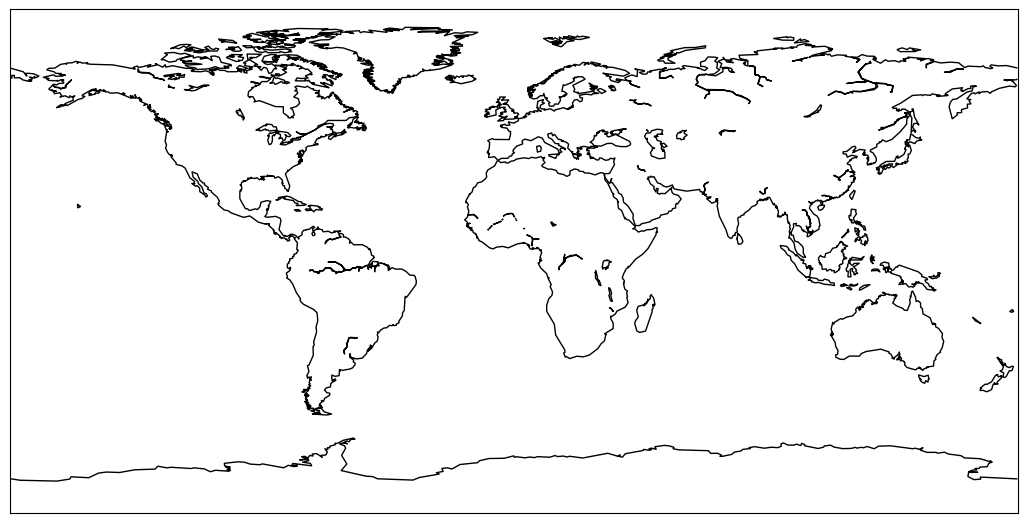

In [23]:
# libraries
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits

# Set the plot size for this notebook:
plt.rcParams["figure.figsize"]=13,13

# Always start witht the basemap function to initialize a map
m=Basemap()

# Show the coast lines
m.drawcoastlines()

plt.show();

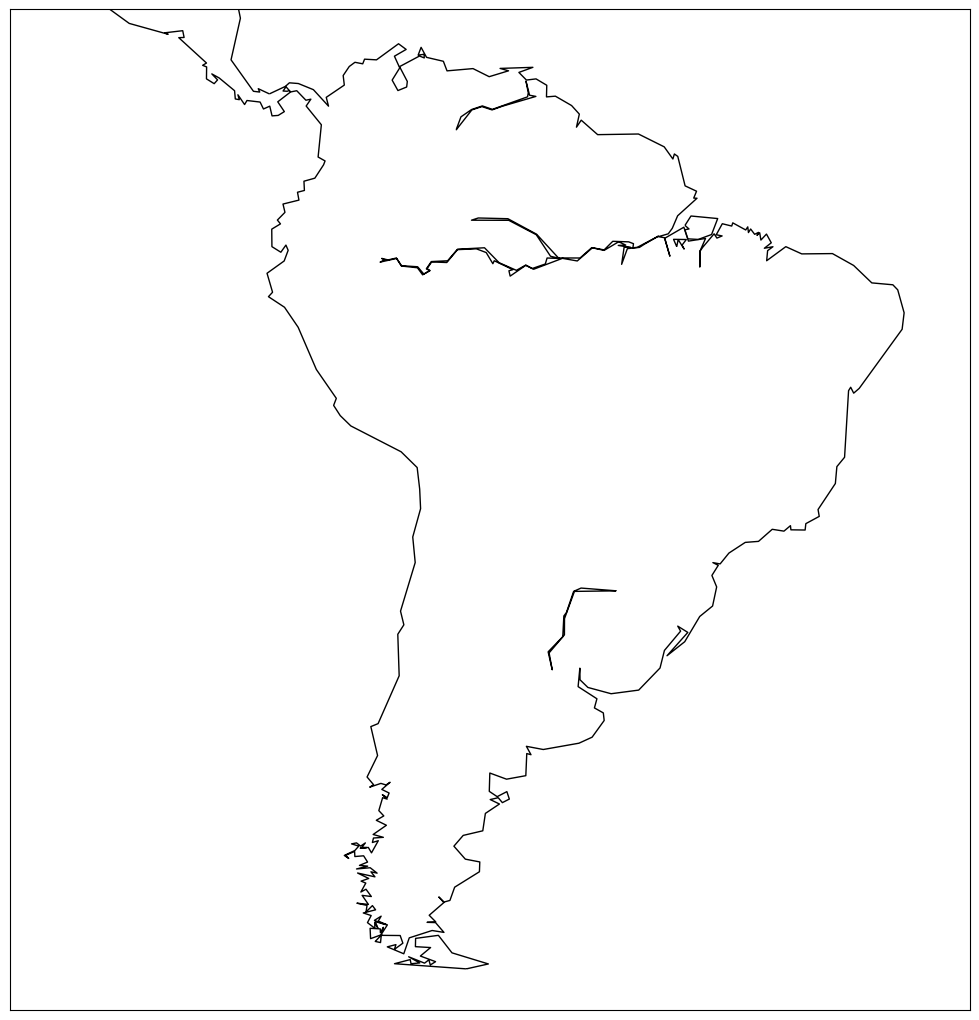

In [26]:
#coastlines can be added with the drawcoastlines()
#select a specific area of the world example south africa
m=Basemap(llcrnrlon=-100, llcrnrlat=-58,urcrnrlon=-30,urcrnrlat=15)

# Show the coast lines
m.drawcoastlines()

plt.show()

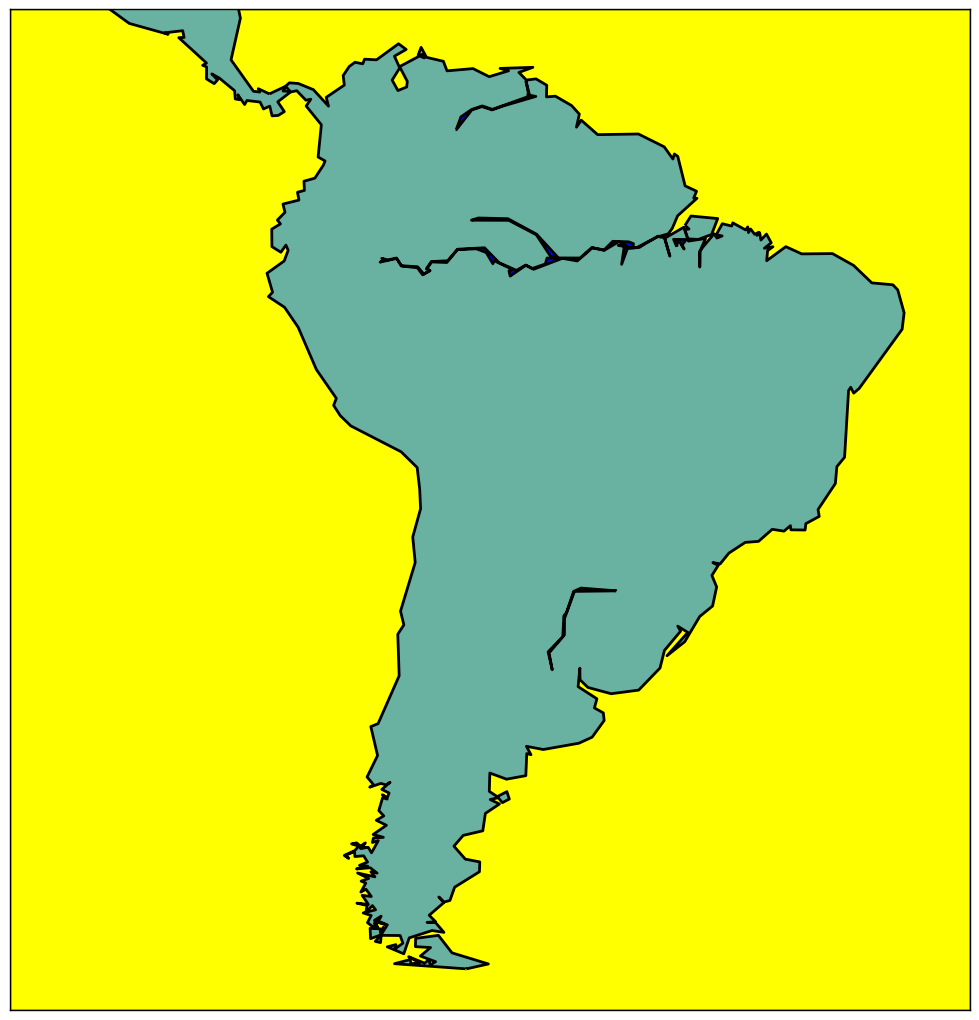

In [35]:
#adding boundaries, color, width and so on..
# Initialize
m=Basemap(llcrnrlon=-100, llcrnrlat=-58,urcrnrlon=-30,urcrnrlat=15)

# Background color:
m.drawmapboundary(fill_color='yellow')

# Continent in green
m.fillcontinents(color='#69b2a2',lake_color='blue')

# Show the coast lines in black
m.drawcoastlines(color='black', linewidth=2)

plt.show()

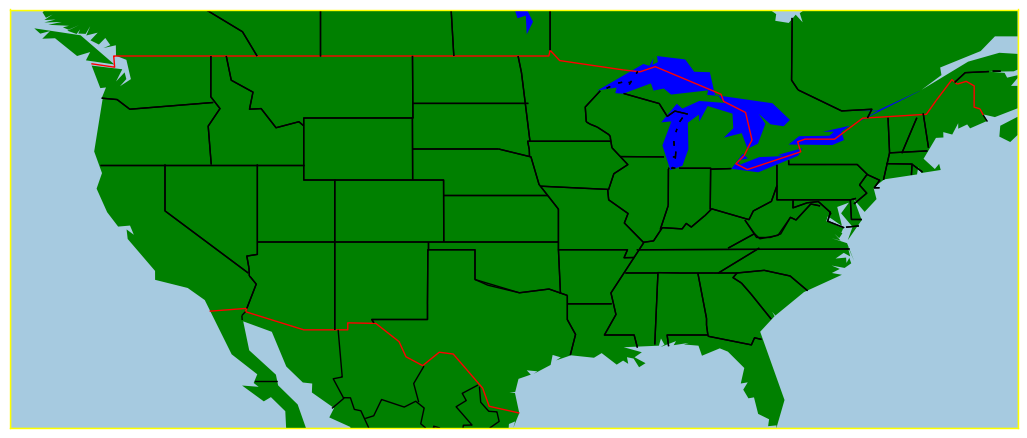

In [33]:
#the list of available boundaries using  drawcoastlines()
#Country boundaries using drawmapboundary()
#continents with fillcontinents(), rivers with drawrivers(), US counties with drawcounties() and US states with drawstates()

# initialise US boundaries
map = Basemap(llcrnrlon=-130, llcrnrlat=25, urcrnrlon=-65.,urcrnrlat=52., lat_0 = 40., lon_0 = -80)

# background color
map.drawmapboundary(fill_color='#A6CAE0', color="yellow")

# country color
map.fillcontinents(color='green',lake_color='blue')
map.drawcountries(color='red', linewidth=1)

# Show states
map.drawstates(color='black', linewidth=1)

plt.show()